# Settings


In [29]:
significance_levels = {0.05: "*", 0.01: "**", 0.001: "***", 0.0001: "****"}
file_location = r"C:\Users\annav\Documents\Surfdrive\Manuscripts\Task relevance\Figures"

## Make some figures


In [1]:
import pandas as pd

# Read main congruency data from CSV files
er_congruency = pd.read_csv(
    r"\\labsdfs.labs.vu.nl\labsdfs\FGB-ETP-CogPsy-ProactiveBrainLab\core_lab_members\Anna\Data\vidi3 - location-by-colour null-cue\saved_data\beh_congruency_er.txt",
    header=None,
    names=["congruent", "incongruent"],
)
dt_congruency = pd.read_csv(
    r"\\labsdfs.labs.vu.nl\labsdfs\FGB-ETP-CogPsy-ProactiveBrainLab\core_lab_members\Anna\Data\vidi3 - location-by-colour null-cue\saved_data\beh_congruency_dt.txt",
    header=None,
    names=["congruent", "incongruent"],
)

# Read congruency effect data from CSV files
er_congruency_effect = pd.read_csv(
    r"\\labsdfs.labs.vu.nl\labsdfs\FGB-ETP-CogPsy-ProactiveBrainLab\core_lab_members\Anna\Data\vidi3 - location-by-colour null-cue\saved_data\beh_congruency_er_effect.txt",
    header=None,
    names=[
        "loc_cue_loc_probe",
        "loc_cue_col_probe",
        "col_cue_loc_probe",
        "col_cue_col_probe",
    ],
)

dt_congruency_effect = pd.read_csv(
    r"\\labsdfs.labs.vu.nl\labsdfs\FGB-ETP-CogPsy-ProactiveBrainLab\core_lab_members\Anna\Data\vidi3 - location-by-colour null-cue\saved_data\beh_congruency_dt_effect.txt",
    header=None,
    names=[
        "loc_cue_loc_probe",
        "loc_cue_col_probe",
        "col_cue_loc_probe",
        "col_cue_col_probe",
    ],
)

### Congruency effect


Error (deg)  mean: 0.8421528155502869
Error (deg)  sem: 0.17305674327607362
Reaction time (ms)  mean: 27.0127925400506
Reaction time (ms)  sem: 9.330308845584266


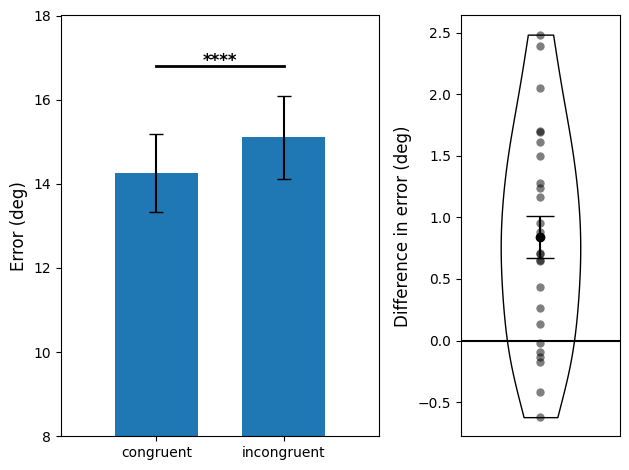

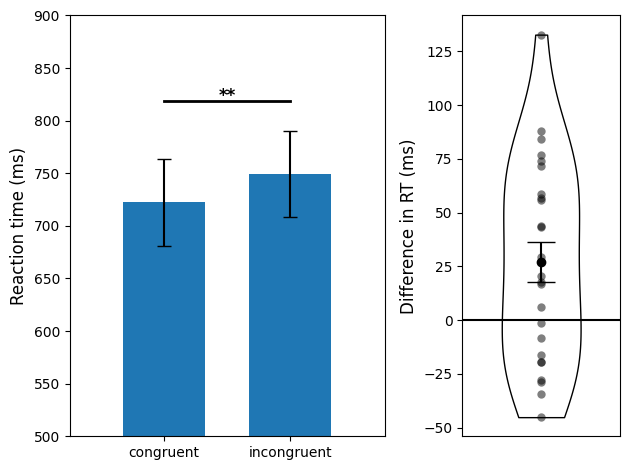

In [81]:
import matplotlib.pyplot as plt
import scipy.stats as stats

y_labels = ["Error (deg)", "Reaction time (ms)"]
diff_y_labels = ["Difference in error (deg)", "Difference in RT (ms)"]
y_lims = [[8, 18], [500, 900]]
x_lims = [[-0.75, 1.75], [-0.75, 1.75]]

for idx, data in enumerate([er_congruency, dt_congruency]):
    # Determine diff data
    data_diff = data["incongruent"] - data["congruent"]

    # Make figure
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1])

    # Draw barchart in axis 1
    ax1.bar(
        [data.columns[0], data.columns[1]],
        data.mean(),
        yerr=data.sem(),
        capsize=5,
        width=0.65,
    )

    ax1.set_ylim(y_lims[idx])
    ax1.set_xlim(x_lims[idx])
    ax1.set_ylabel(y_labels[idx], fontsize=12)

    # Draw violinplot in axis 2
    v = ax2.violinplot(
        data_diff,
        showextrema=False,
    )

    v["bodies"][0].set_facecolor("white")
    v["bodies"][0].set_edgecolor("black")
    v["bodies"][0].set_alpha(1)

    ax2.errorbar(
        1,
        data_diff.mean(),
        yerr=data_diff.sem(),
        fmt="o",
        color="black",
        capsize=10,
    )

    ax2.scatter(25 * [1], data_diff, alpha=0.5, color="black", linewidths=0)
    ax2.axhline(y=0, color="k")
    ax2.set_xlim(0.5, 1.5)
    ax2.xaxis.set_visible(False)
    ax2.set_ylabel(diff_y_labels[idx], fontsize=12)

    fig.tight_layout()

    # Add significance
    p_value = stats.ttest_rel(data["congruent"], data["incongruent"])[1]
    if p_value < 0.05:
        # Determine significance level based on p-value
        for key in reversed(significance_levels.keys()):
            if p_value < key:
                asterisks = significance_levels[key]
                break

        # Add significance to barplot
        ax1.text(
            0.5,
            data["incongruent"].mean() + 1.7 * data["incongruent"].sem(),
            asterisks,
            ha="center",
            va="baseline",
            fontsize=12,
            weight="bold",
        )
        ax1.plot(
            [0, 1],
            [
                data["incongruent"].mean() + 1.7 * data["incongruent"].sem(),
                data["incongruent"].mean() + 1.7 * data["incongruent"].sem(),
            ],
            color="black",
            linewidth=2,
        )

    # Save figure
    fig.savefig(
        f"{file_location}\congruency_{y_labels[idx].replace(' ', '_')}.png",
        dpi=300,
    )

    # Print stats
    print(y_labels[idx] + "  mean: " + str(data_diff.mean()))
    print(y_labels[idx] + "  sem: " + str(data_diff.sem()))

### Cue x Probe interaction effect


#### Without violin of differences


col_cue_loc_probe to 0: TtestResult(statistic=3.074201177802883, pvalue=0.005199245583979902, df=24)
col_cue_col_probe to 0: TtestResult(statistic=3.2138910589551077, pvalue=0.0037136029455675833, df=24)
Error effect (deg), l_c vs. c_c: TtestResult(statistic=-3.016885836785193, pvalue=0.005961482144931247, df=24)
col_cue_col_probe to 0: TtestResult(statistic=3.236731184166644, pvalue=0.0035134279782427272, df=24)
Reaction time effect (ms), l_c vs. c_c: TtestResult(statistic=-2.6143652426874437, pvalue=0.015202125747035392, df=24)


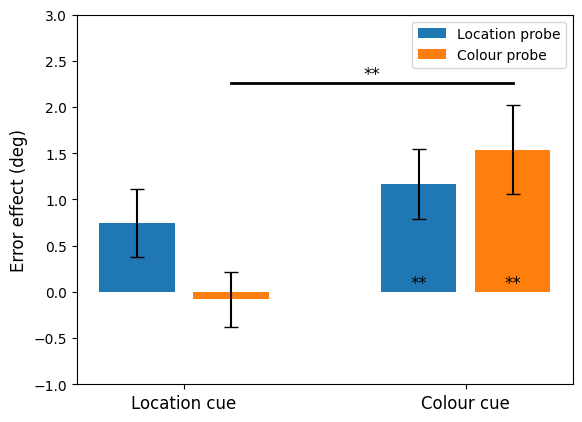

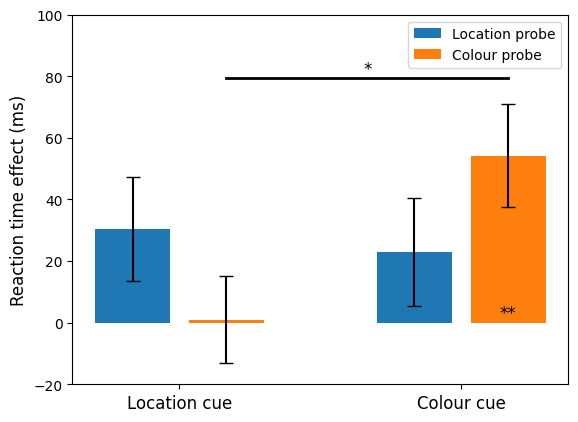

In [48]:
import matplotlib.pyplot as plt
import scipy.stats as stats

y_lims = [[-1, 3], [-20, 100]]
y_labels = ["Error effect (deg)", "Reaction time effect (ms)"]
rel_positions = [1, 2, 4, 5]

for idx, data in enumerate([er_congruency_effect, dt_congruency_effect]):
    loc_cue_diff_data = data["loc_cue_loc_probe"] - data["loc_cue_col_probe"]
    col_cue_diff_data = data["col_cue_col_probe"] - data["col_cue_loc_probe"]

    # Make figure
    fig, ax = plt.subplots()

    # Draw barcharts of location probe data
    bl = ax.bar(
        [1, 4],
        [data["loc_cue_loc_probe"].mean(), data["col_cue_loc_probe"].mean()],
        yerr=[data["loc_cue_loc_probe"].sem(), data["col_cue_loc_probe"].sem()],
        capsize=5,
    )

    # Draw barcharts of colour probe data
    bc = ax.bar(
        [2, 5],
        [data["loc_cue_col_probe"].mean(), data["col_cue_col_probe"].mean()],
        yerr=[data["loc_cue_col_probe"].sem(), data["col_cue_col_probe"].sem()],
        capsize=5,
    )

    # Set x-axis
    ax.set_xticks([1.5, 4.5])
    ax.set_xticklabels(["Location cue", "Colour cue"], fontsize=12)

    # Set y-axis
    ax.set_ylabel(y_labels[idx], fontsize=12)
    ax.set_ylim(y_lims[idx])

    # Set legend
    ax.legend([bl, bc], ["Location probe", "Colour probe"])

    # Add significance of single bars
    for jdx, column in enumerate(data):
        p_value = stats.ttest_1samp(data[column], 0)[1]
        if p_value < (0.05 / (len(data.columns))):
            for key in reversed(significance_levels.keys()):
                if p_value < key:
                    asterisks = significance_levels[key]
                    break
            ax.text(
                rel_positions[jdx], 0, asterisks, ha="center", va="bottom", fontsize=12
            )
            print(
                f"{data[column].name}"
                + " to 0: "
                + str(stats.ttest_1samp(data[column], 0))
            )

    # Add significant comparisons
    y_line = [
        data["col_cue_col_probe"].mean() + 1.5 * data["col_cue_col_probe"].sem(),
        data["col_cue_col_probe"].mean() + 1.5 * data["col_cue_col_probe"].sem(),
    ]

    # Compare within cue
    if stats.ttest_rel(data["loc_cue_loc_probe"], data["loc_cue_col_probe"])[1] < 0.05:
        ax.text(1.5, y_line[0], "*", ha="center", va="bottom", fontsize=12)
        ax.plot([1, 2], y_line, color="black", linewidth=2)
        print(stats.ttest_rel(data["loc_cue_loc_probe"], data["loc_cue_col_probe"]))
    if stats.ttest_rel(data["col_cue_loc_probe"], data["col_cue_col_probe"])[1] < 0.05:
        ax.text(4.5, y_line[0], "*", ha="center", va="bottom", fontsize=12)
        ax.plot([4, 5], y_line, color="black", linewidth=2)
        print(stats.ttest_rel(data["col_cue_loc_probe"], data["col_cue_col_probe"]))

    # Compare within probe
    if stats.ttest_rel(data["loc_cue_loc_probe"], data["col_cue_loc_probe"])[1] < 0.05:
        ax.text(2.5, y_line[0], "*", ha="center", va="bottom", fontsize=12)
        ax.plot([1, 4], y_line, color="black", linewidth=2)
        print(stats.ttest_rel(data["loc_cue_loc_probe"], data["col_cue_loc_probe"]))

    p_value = stats.ttest_rel(data["loc_cue_col_probe"], data["col_cue_col_probe"])[1]
    if p_value < 0.05:
        # Determine significance level based on p-value
        for key in reversed(significance_levels.keys()):
            if p_value < key:
                asterisks = significance_levels[key]
                break
        ax.text(3.5, y_line[0], asterisks, ha="center", va="bottom", fontsize=12)
        ax.plot([2, 5], y_line, color="black", linewidth=2)
        print(
            f"{y_labels[idx]}, l_c vs. c_c: "
            + str(stats.ttest_rel(data["loc_cue_col_probe"], data["col_cue_col_probe"]))
        )

    # Save figure
    fig.savefig(
        f"{file_location}\cue_by_probe_{y_labels[idx].replace(' ', '_')}.png",
        dpi=300,
    )

#### With violin of differences


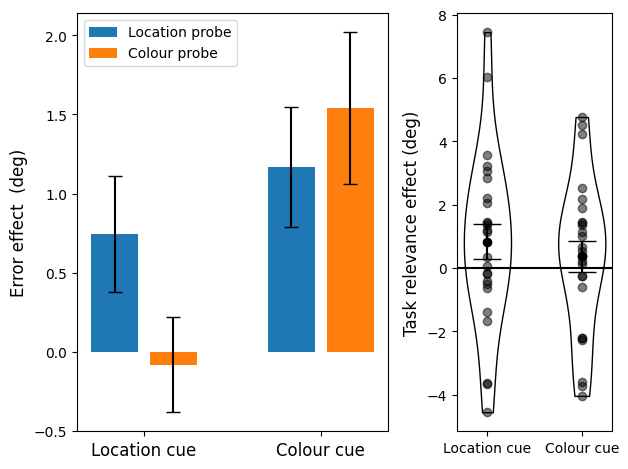

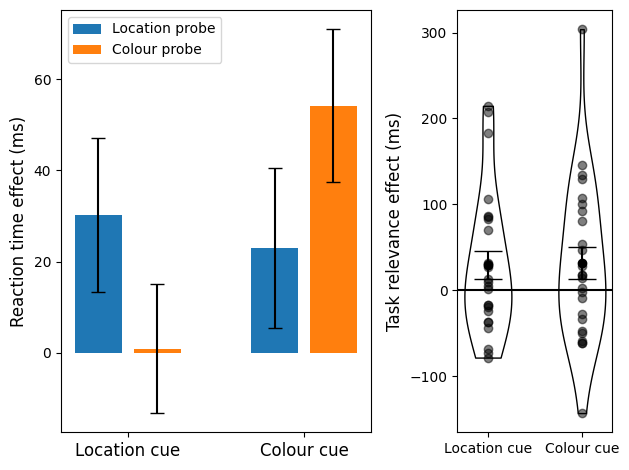

In [49]:
import matplotlib.pyplot as plt

y_lims = [[-1, 3], [-20, 100]]
y_labels = ["Error effect ", "Reaction time effect"]
y_label_units = [" (deg)", " (ms)"]

for idx, data in enumerate([er_congruency_effect, dt_congruency_effect]):
    loc_cue_diff_data = data["loc_cue_loc_probe"] - data["loc_cue_col_probe"]
    col_cue_diff_data = data["col_cue_col_probe"] - data["col_cue_loc_probe"]

    # Make figure
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1])

    # Draw barcharts of location probe data
    bl = ax1.bar(
        [1, 4],
        [data["loc_cue_loc_probe"].mean(), data["col_cue_loc_probe"].mean()],
        yerr=[data["loc_cue_loc_probe"].sem(), data["col_cue_loc_probe"].sem()],
        capsize=5,
    )

    # Draw barcharts of colour probe data
    bc = ax1.bar(
        [2, 5],
        [data["loc_cue_col_probe"].mean(), data["col_cue_col_probe"].mean()],
        yerr=[data["loc_cue_col_probe"].sem(), data["col_cue_col_probe"].sem()],
        capsize=5,
    )

    # Set x-axis
    ax1.set_xticks([1.5, 4.5])
    ax1.set_xticklabels(["Location cue", "Colour cue"], fontsize=12)

    # Set y-axis
    ax1.set_ylabel(y_labels[idx] + y_label_units[idx], fontsize=12)
    # ax1.set_ylim(y_lims[idx])

    # Set legend
    ax1.legend([bl, bc], ["Location probe", "Colour probe"])

    # Draw difference data
    v = ax2.violinplot(
        [loc_cue_diff_data, col_cue_diff_data],
        showextrema=False,
    )
    for plot in v["bodies"]:
        plot.set_facecolor("white")
        plot.set_edgecolor("black")
        plot.set_alpha(1)

    ax2.errorbar(
        1,
        loc_cue_diff_data.mean(),
        yerr=loc_cue_diff_data.sem(),
        fmt="o",
        color="black",
        capsize=10,
    )

    ax2.errorbar(
        2,
        col_cue_diff_data.mean(),
        yerr=col_cue_diff_data.sem(),
        fmt="o",
        color="black",
        capsize=10,
    )

    ax2.scatter(25 * [1], loc_cue_diff_data, alpha=0.5, color="black")
    ax2.scatter(25 * [2], col_cue_diff_data, alpha=0.5, color="black")

    ax2.set_ylabel("Task relevance effect" + y_label_units[idx], fontsize=12)
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(["Location cue", "Colour cue"])
    ax2.axhline(y=0, color="k")

    fig.tight_layout()

### Location cue vs. colour cue


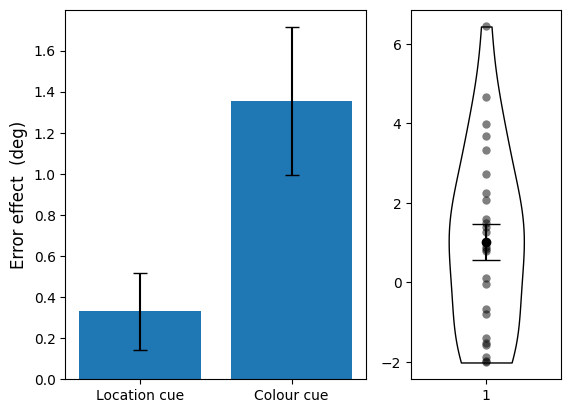

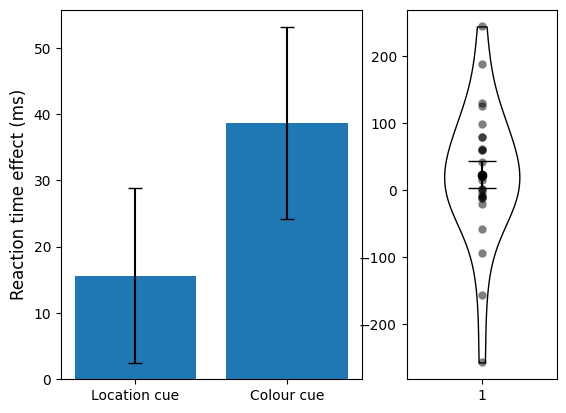

In [80]:
import matplotlib.pyplot as plt

y_labels = ["Error effect ", "Reaction time effect"]
y_label_units = [" (deg)", " (ms)"]

for idx, data in enumerate([er_congruency_effect, dt_congruency_effect]):
    
    # Collate data by cue type
    loc_cue = pd.DataFrame([data["loc_cue_loc_probe"], data["loc_cue_col_probe"]]).mean(0)
    col_cue = pd.DataFrame([data["col_cue_col_probe"], data["col_cue_loc_probe"]]).mean(0)
    cue_diff = col_cue - loc_cue

    # Make barplot
    fig, [ax1, ax2] = plt.subplots(1, 2, width_ratios=[2, 1])
    ax1.bar([1, 2], [loc_cue.mean(), col_cue.mean()], yerr=[loc_cue.sem(), col_cue.sem()], capsize=5)
    ax1.set_xticks([1, 2])
    ax1.set_xticklabels(["Location cue", "Colour cue"])

    ax1.set_ylabel(y_labels[idx] + y_label_units[idx], fontsize=12)

    # Make violinplot
    v = ax2.violinplot([cue_diff], showextrema=False)
    for plot in v["bodies"]:
        plot.set_facecolor("white")
        plot.set_edgecolor("black")
        plot.set_alpha(1)

    ax2.errorbar(1, cue_diff.mean(), yerr=cue_diff.sem(), fmt="o", color="black", capsize=10)

    ax2.scatter(25 * [1], cue_diff, alpha=0.5, color="black", linewidths=0)

    ax2.set_xticks([1])
    ax2.set_xlim(0.5, 1.5)


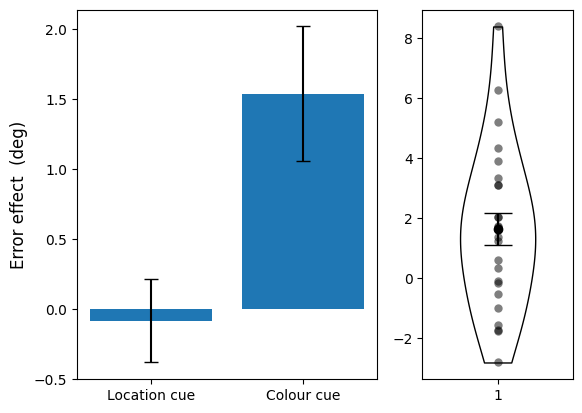

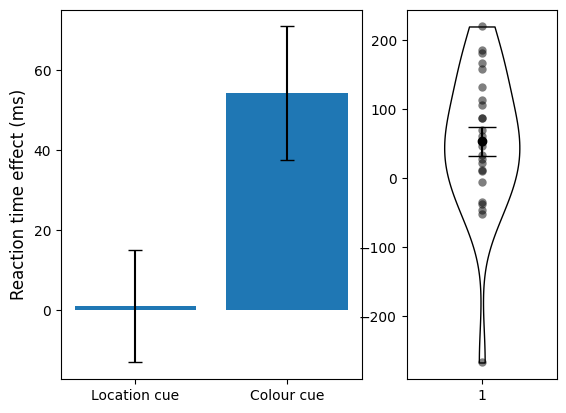

In [82]:
import matplotlib.pyplot as plt

y_labels = ["Error effect ", "Reaction time effect"]
y_label_units = [" (deg)", " (ms)"]

for idx, data in enumerate([er_congruency_effect, dt_congruency_effect]):
    
    # Collate data by cue type
    loc_cue = data["loc_cue_col_probe"]
    col_cue = data["col_cue_col_probe"]
    cue_diff = col_cue - loc_cue

    # Make barplot
    fig, [ax1, ax2] = plt.subplots(1, 2, width_ratios=[2, 1])
    ax1.bar([1, 2], [loc_cue.mean(), col_cue.mean()], yerr=[loc_cue.sem(), col_cue.sem()], capsize=5)
    ax1.set_xticks([1, 2])
    ax1.set_xticklabels(["Location cue", "Colour cue"])

    ax1.set_ylabel(y_labels[idx] + y_label_units[idx], fontsize=12)

    # Make violinplot
    v = ax2.violinplot([cue_diff], showextrema=False)
    for plot in v["bodies"]:
        plot.set_facecolor("white")
        plot.set_edgecolor("black")
        plot.set_alpha(1)

    ax2.errorbar(1, cue_diff.mean(), yerr=cue_diff.sem(), fmt="o", color="black", capsize=10)

    ax2.scatter(25 * [1], cue_diff, alpha=0.5, color="black", linewidths=0)

    ax2.set_xticks([1])
    ax2.set_xlim(0.5, 1.5)